<a href="https://colab.research.google.com/github/monicadesAI-tech/Project_74/blob/main/Cotton_Disease_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Project reuires little more internet data to run, so be ready with it.

# First sign-in in your gmail account and then open colab.

# Before running all codes - Select Runtime > Select 'Change Runtime' option > Select GPU > OK.
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
# Uncomment below line and complete mounting process authentication than only proceed further.

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# I have uploaded Datasets Folder on Google Drive from my laptop in My DL Project - you also have to upload it on your drive.
train_data_path = "/content/drive/My Drive/My DL Project/cotton plant disease prediction/Datasets/train"
validation_data_path = "/content/drive/My Drive/My DL Project/cotton plant disease prediction/Datasets/val"

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


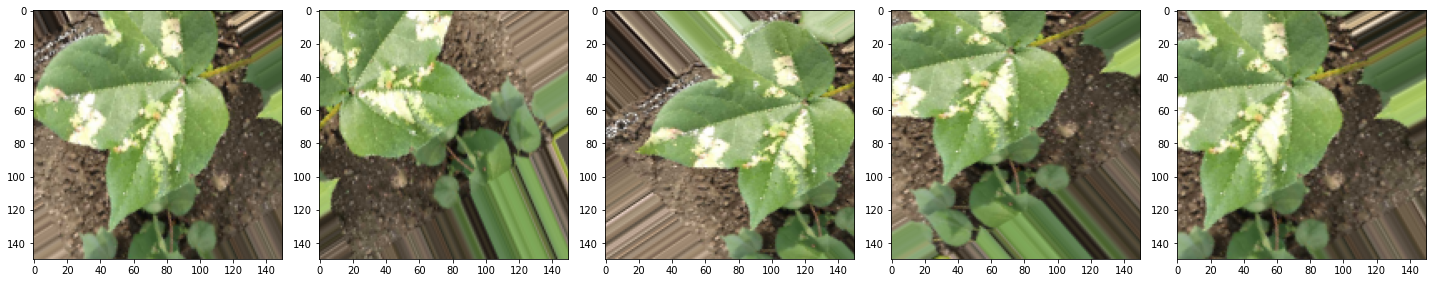

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using val accuracy
model_path = '/content/drive/My Drive/My DL Project/cotton plant disease prediction/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# It took around 5hours to run this below given epochs.
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.4685 
Epoch 00001: val_accuracy improved from -inf to 0.47840, saving model to /content/drive/My Drive/My DL Project/cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 862s 14s/step - loss: 1.2287 - accuracy: 0.4685 - val_loss: 1.0641 - val_accuracy: 0.4784
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0302 - accuracy: 0.5633
Epoch 00002: val_accuracy improved from 0.47840 to 0.60185, saving model to /content/drive/My Drive/My DL Project/cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 26s 434ms/step - loss: 1.0302 - accuracy: 0.5633 - val_loss: 0.9316 - val_accuracy: 0.6019
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9429 - accuracy: 0.6325
Epoch 00003: val_accuracy did not improve from 0.60185
61/61 [==============================] - 26s 422ms/step - loss: 0.942

In [ ]:
model_path2 = '/content/drive/My Drive/My DL Project/cotton plant disease prediction/v3_1_red_cott_dis.h5'
cnn_model.save(model_path2)

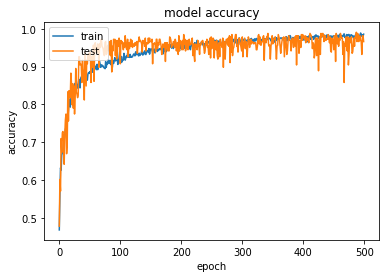

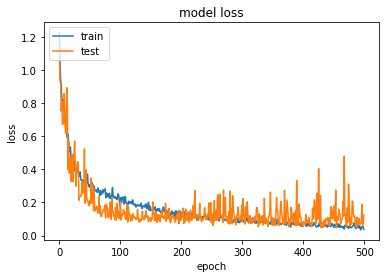

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

{'accuracy': [0.46847769618034363,
  0.5633008480072021,
  0.632496178150177,
  0.6263454556465149,
  0.6663249731063843,
  0.671963095664978,
  0.6786263585090637,
  0.6960533261299133,
  0.7068170309066772,
  0.7160430550575256,
  0.7344951033592224,
  0.7401332855224609,
  0.7647360563278198,
  0.7708867192268372,
  0.7611481547355652,
  0.7837006449699402,
  0.8144541382789612,
  0.8067657351493835,
  0.7929267287254333,
  0.8165043592453003,
  0.8247053027153015,
  0.8211174011230469,
  0.8313685059547424,
  0.8313685059547424,
  0.8400819897651672,
  0.8380317687988281,
  0.8559712767601013,
  0.8441824913024902,
  0.8549461960792542,
  0.8477703928947449,
  0.8431573510169983,
  0.8559712767601013,
  0.8662224411964417,
  0.859559178352356,
  0.8436698913574219,
  0.8682726621627808,
  0.8728857040405273,
  0.8713480234146118,
  0.8667349815368652,
  0.8774987459182739,
  0.8728857040405273,
  0.8867247700691223,
  0.8790363669395447,
  0.886212170124054,
  0.8646847605705261,
 